In [20]:
import pathlib
import pandas as pd

# set the root directory as parent of current directory
root = pathlib.Path.cwd().parent

C:\Users\User\AppData\Local\Temp\ipykernel_27072\2538470682.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


<Figure size 640x480 with 0 Axes>

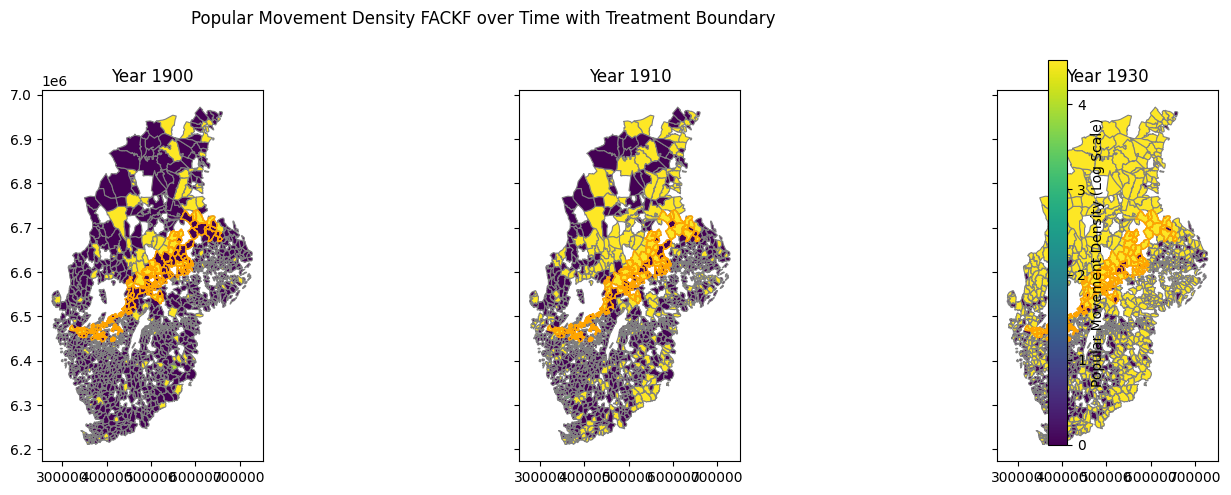

In [25]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the geojson file
gdf = gpd.read_file(root / "data/maps/Swedish_parishes_1926_short_parish_code.geojson")
# Load the csv file
df = pd.read_csv(root / 'data/union-data/union_density_treatment_and_control.csv')

# Merge the datasets
merged = gdf.merge(df, on='parish_code')

treated = merged[merged['treated'] == 1]
treated.boundary.plot(ax=ax, color='orange', linewidth=1)


# Filter the data
filtered_data = merged[merged['distance_to_line'] < 250]

# Set up the color scale
vmin, vmax = 0, np.log1p(filtered_data['popular_movement_density_1900_FACKF'].max())
norm = plt.Normalize(vmin, vmax)
cmap = plt.cm.viridis

# Define the years and corresponding columns
years = [1900, 1910, 1930]
columns = ['popular_movement_density_1900_FACKF', 'popular_movement_density_1910_FACKF', 'popular_movement_density_1930_FACKF']

# Calculate the midpoint for the color scale
desc_1900 = filtered_data['popular_movement_density_1900_FACKF'].describe(percentiles=[.9])
desc_1910 = filtered_data['popular_movement_density_1910_FACKF'].describe(percentiles=[.9])
desc_1930 = filtered_data['popular_movement_density_1930_FACKF'].describe(percentiles=[.9])
midpoint = max(desc_1900['90%'], desc_1910['90%'], desc_1930['90%'])
vmax = np.log1p(midpoint)
norm = plt.Normalize(vmin, vmax)

# Plot the facets
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharex=True, sharey=True)

for ax, year, column in zip(axs, years, columns):
    filtered_data.plot(column=column, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='grey', norm=norm)
    treated.boundary.plot(ax=ax, color='orange', linewidth=1)
    ax.set_title(f'Year {year}')

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cbar = fig.colorbar(sm, ax=axs, orientation='vertical', fraction=0.03, pad=0.1)
cbar.set_label('Popular Movement Density (Log Scale)')

# Show the map
plt.suptitle('Popular Movement Density FACKF over Time with Treatment Boundary')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_27072\983904665.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


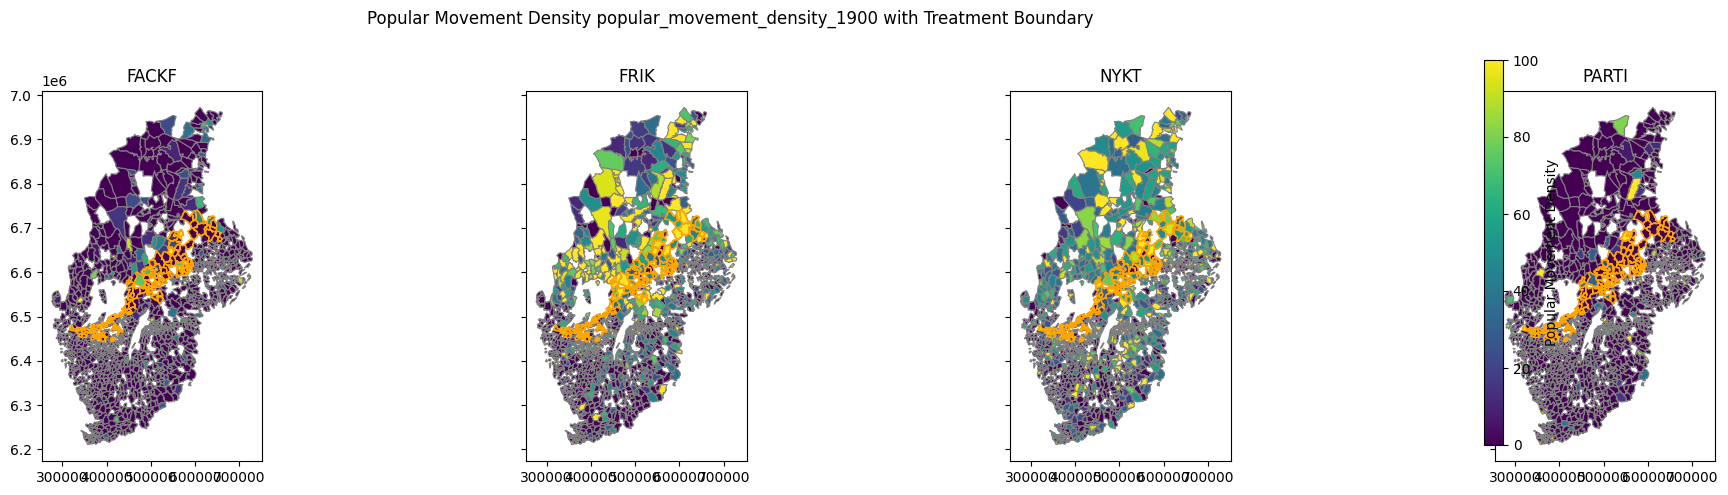

In [28]:
def plot_density_over_time(prefix, distance_threshold=250):
    import geopandas as gpd
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np

    # Load the geojson file
    gdf = gpd.read_file(root / "data/maps/Swedish_parishes_1926_short_parish_code.geojson")
    # Load the csv file
    df = pd.read_csv(root / 'data/union-data/union_density_treatment_and_control.csv')


    # Merge the datasets
    merged = gdf.merge(df, on='parish_code')

    # Filter the data
    filtered_data = merged[merged['distance_to_line'] < distance_threshold]

    # Set up the color scale
    vmin, vmax = 0, 100
    norm = plt.Normalize(vmin, vmax)
    cmap = plt.cm.viridis

    # Define the variables
    variables = ['FACKF', 'FRIK', 'NYKT', 'PARTI']

    # Plot the facets
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharex=True, sharey=True)

    for ax, var in zip(axs, variables):
        column = f'{prefix}_{var}'
        filtered_data.plot(column=column, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='grey', norm=norm)
        treated.boundary.plot(ax=ax, color='orange', linewidth=1)
        ax.set_title(var)

    # Add color bar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm._A = []
    cbar = fig.colorbar(sm, ax=axs, orientation='vertical', fraction=0.03, pad=0.1)
    cbar.set_label('Popular Movement Density')

    # Show the map
    plt.suptitle(f'Popular Movement Density {prefix} with Treatment Boundary')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Example usage:
plot_density_over_time('popular_movement_density_1900')

C:\Users\User\AppData\Local\Temp\ipykernel_27072\983904665.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


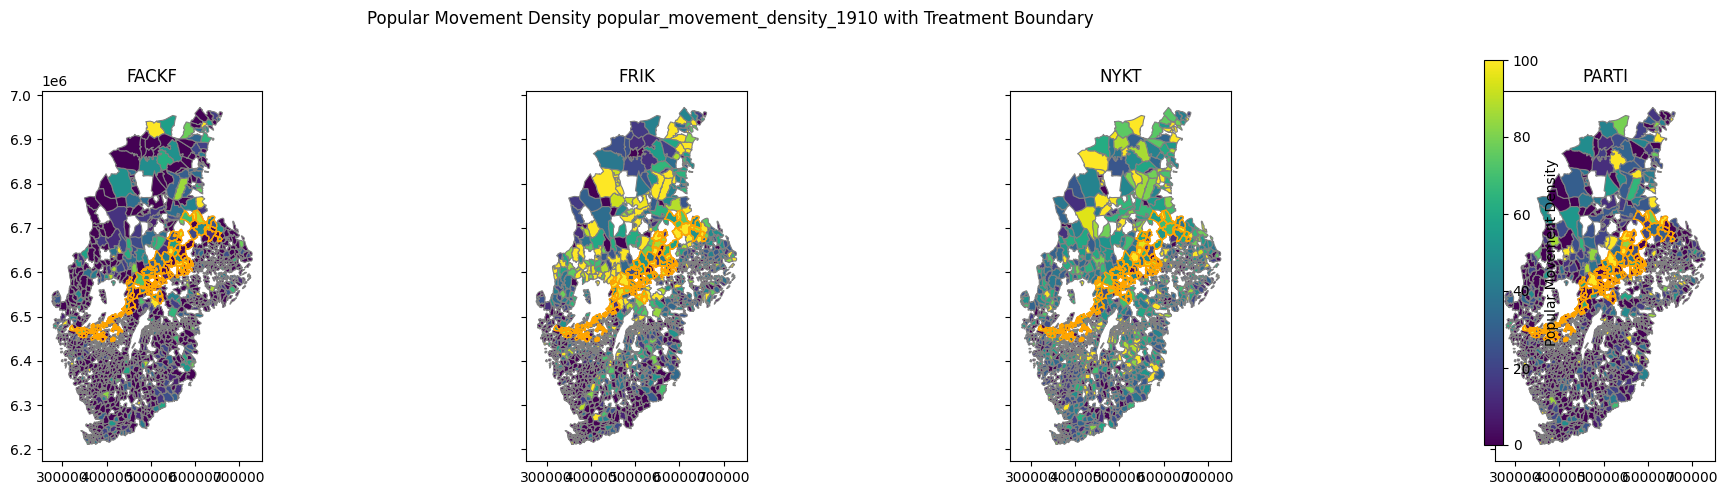

In [29]:
plot_density_over_time('popular_movement_density_1910')

C:\Users\User\AppData\Local\Temp\ipykernel_27072\983904665.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


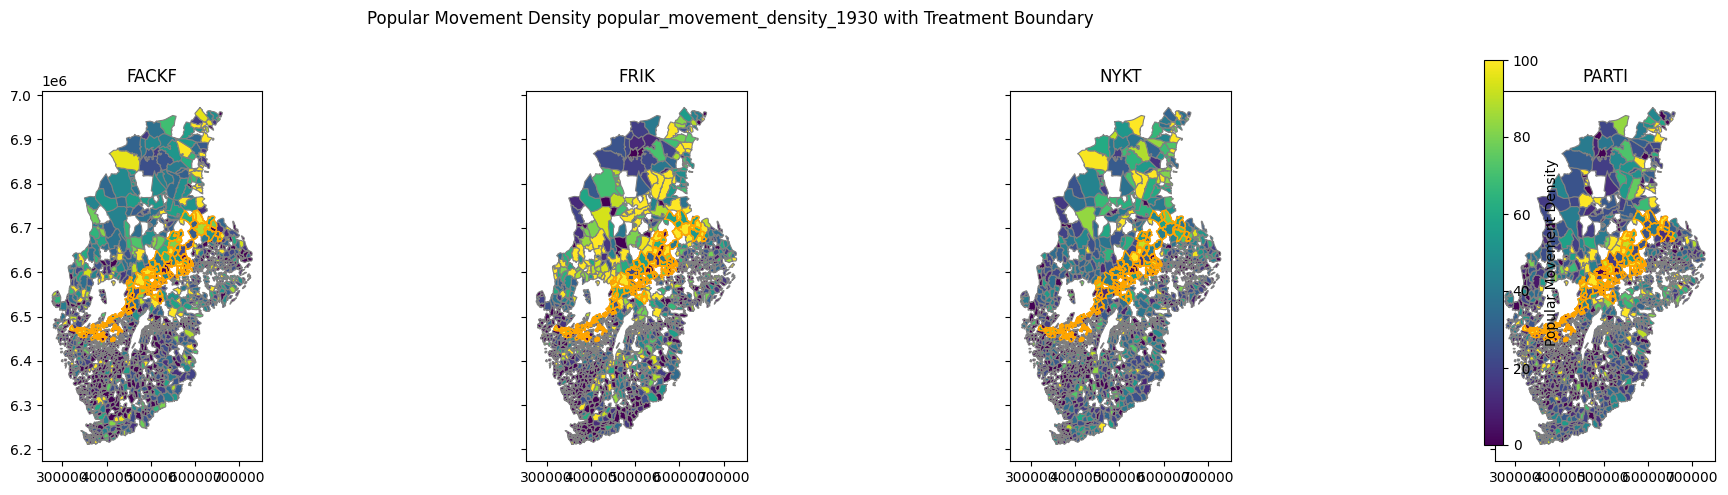

In [30]:
plot_density_over_time('popular_movement_density_1930')

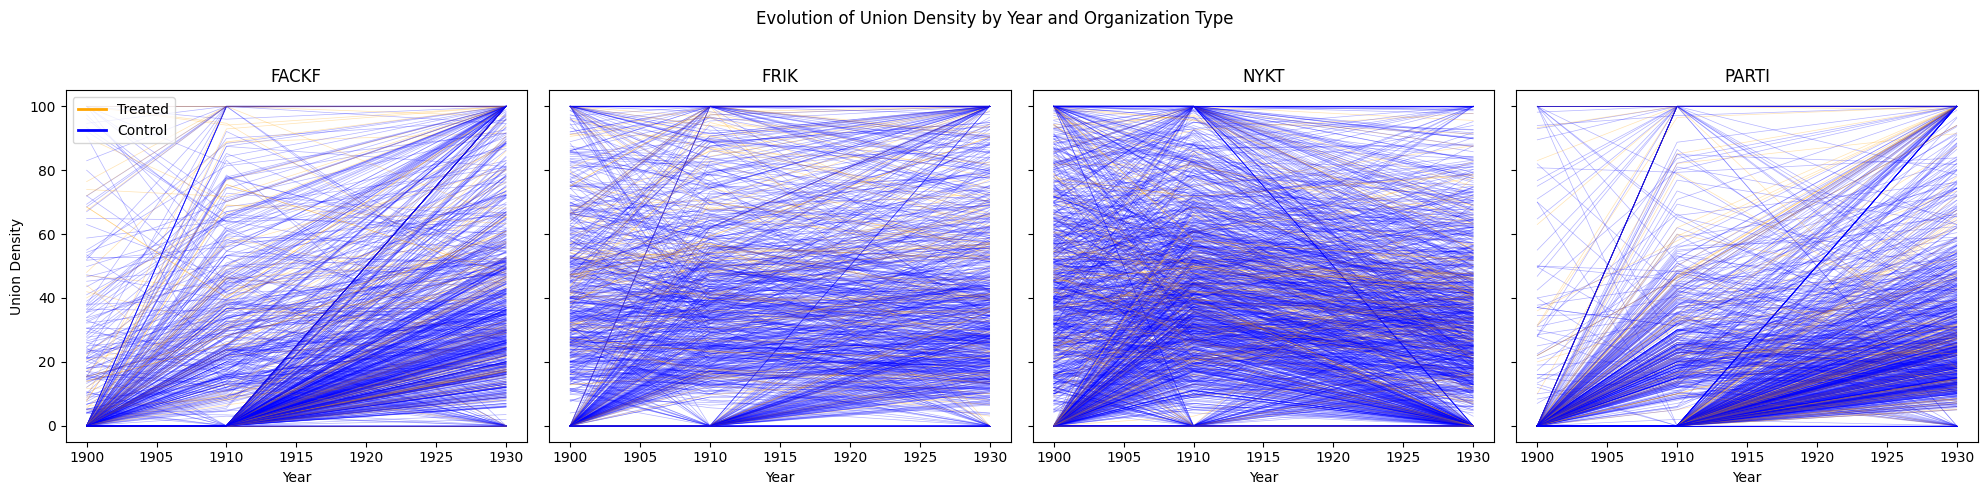

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the csv file

# Filter the data to include only controls less than 250 km from the line
filtered_data = df[df['distance_to_line'] < 250]

# Define the types of organizations
org_types = ['FACKF', 'FRIK', 'NYKT', 'PARTI']

# Set up the figure and axes for the facet graph
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharex=True, sharey=True)

# Plot the lines
for ax, org_type in zip(axs, org_types):
    for index, row in filtered_data.iterrows():
        color = 'orange' if row['treated'] == 1 else 'blue'
        years = [1900, 1910, 1930]
        densities = [min(100, row[f'popular_movement_density_{year}_{org_type}']) for year in years]
        ax.plot(years, densities, color=color, alpha=0.3, linewidth=0.5)
    ax.set_title(org_type)

# Set the labels and title
axs[0].set_ylabel('Union Density')
for ax in axs:
    ax.set_xlabel('Year')
plt.suptitle('Evolution of Union Density by Year and Organization Type')

# Add the legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='orange', lw=2, label='Treated'),
                   Line2D([0], [0], color='blue', lw=2, label='Control')]
axs[0].legend(handles=legend_elements, loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


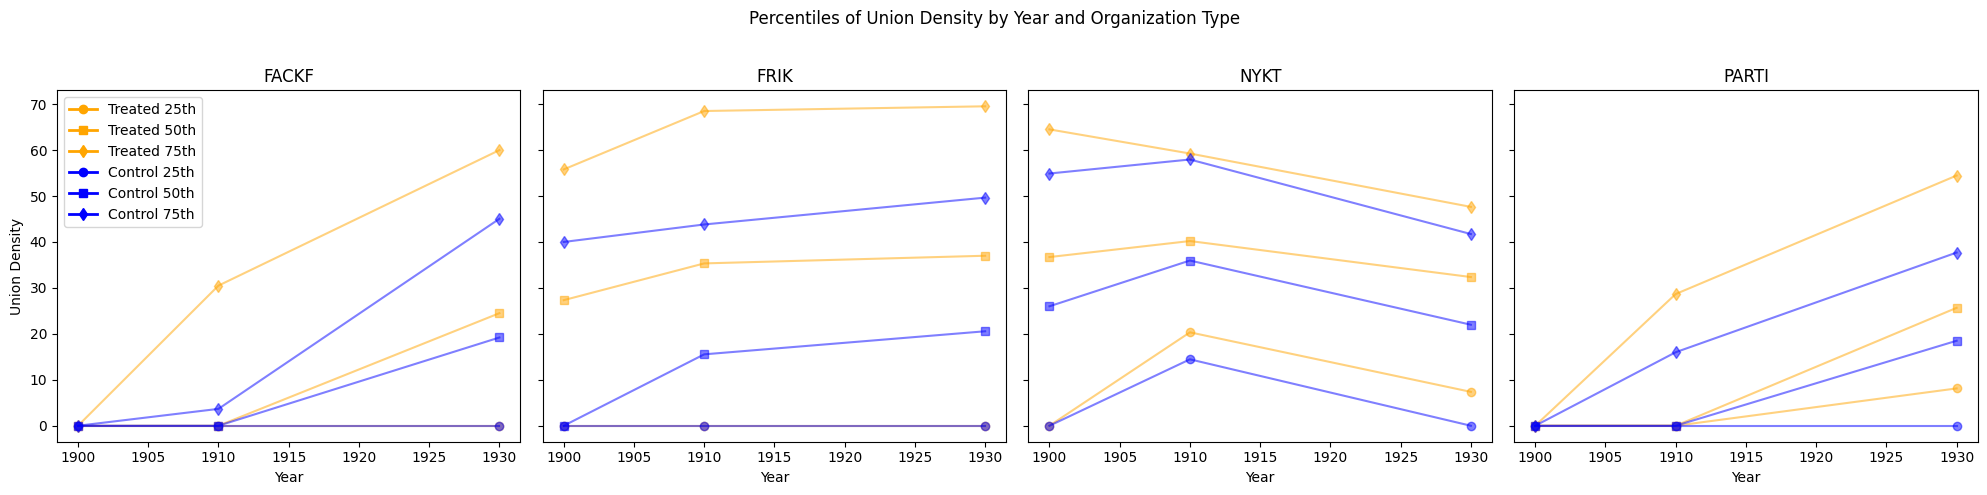

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the csv file

# Filter the data to include only controls less than 250 km from the line
filtered_data = df[df['distance_to_line'] < 250]

# Define the types of organizations
org_types = ['FACKF', 'FRIK', 'NYKT', 'PARTI']

# Set up the figure and axes for the facet graph
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharex=True, sharey=True)

# Plot the lines
for ax, org_type in zip(axs, org_types):
    for treatment_status, color, label in zip([1, 0], ['orange', 'blue'], ['Treated', 'Control']):
        data = filtered_data[filtered_data['treated'] == treatment_status]
        years = [1900, 1910, 1930]
        p25s, p50s, p75s = [], [], []
        for year in years:
            densities = data[f'popular_movement_density_{year}_{org_type}']
            p25, p50, p75 = np.percentile(densities, [25, 50, 75])
            p25s.append(p25)
            p50s.append(p50)
            p75s.append(p75)
        ax.plot(years, p25s, 'o-', color=color, alpha=0.5, label=f'{label} 25th')
        ax.plot(years, p50s, 's-', color=color, alpha=0.5, label=f'{label} 50th')
        ax.plot(years, p75s, 'd-', color=color, alpha=0.5, label=f'{label} 75th')
    ax.set_title(org_type)

# Set the labels and title
axs[0].set_ylabel('Union Density')
for ax in axs:
    ax.set_xlabel('Year')
plt.suptitle('Percentiles of Union Density by Year and Organization Type')

# Add the legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='orange', marker='o', lw=2, label='Treated 25th'),
                   Line2D([0], [0], color='orange', marker='s', lw=2, label='Treated 50th'),
                   Line2D([0], [0], color='orange', marker='d', lw=2, label='Treated 75th'),
                   Line2D([0], [0], color='blue', marker='o', lw=2, label='Control 25th'),
                   Line2D([0], [0], color='blue', marker='s', lw=2, label='Control 50th'),
                   Line2D([0], [0], color='blue', marker='d', lw=2, label='Control 75th')]
axs[0].legend(handles=legend_elements, loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


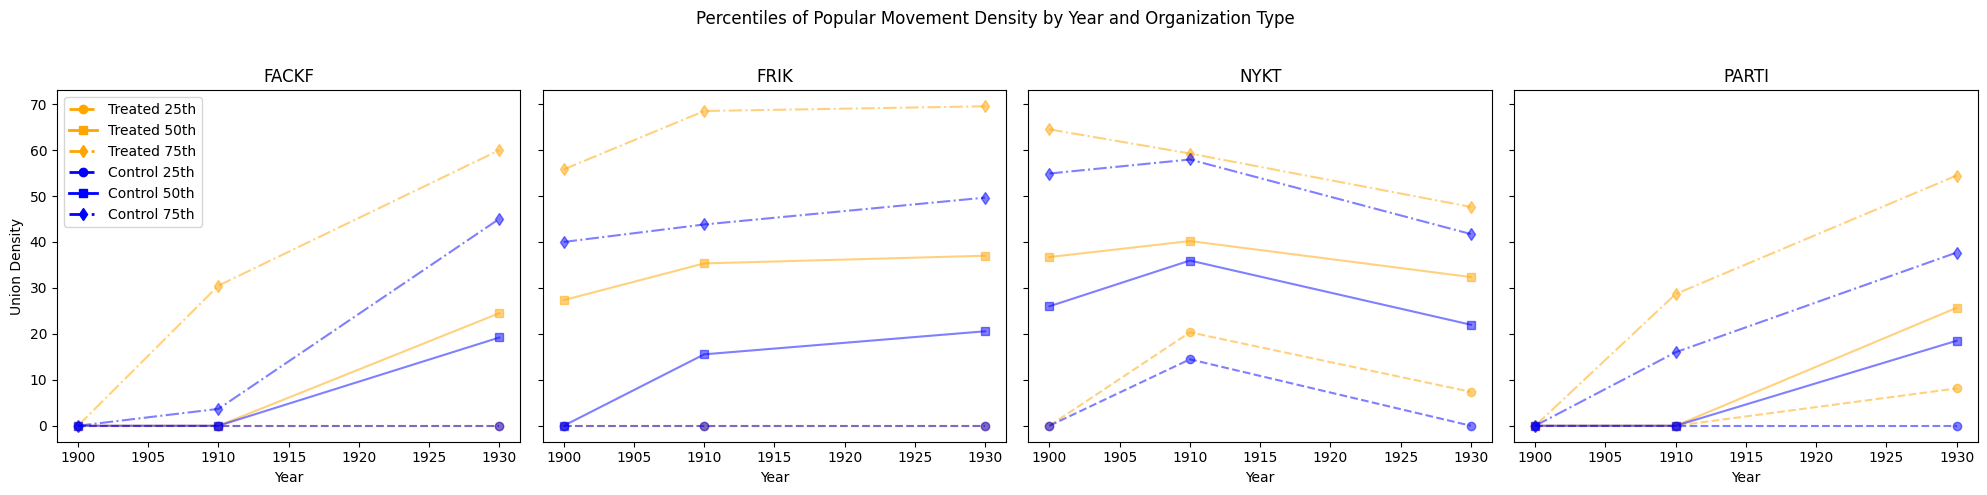

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the csv file

# Filter the data to include only controls less than 250 km from the line
filtered_data = df[df['distance_to_line'] < 250]

# Define the types of organizations
org_types = ['FACKF', 'FRIK', 'NYKT', 'PARTI']

# Set up the figure and axes for the facet graph
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharex=True, sharey=True)

# Plot the lines
for ax, org_type in zip(axs, org_types):
    for treatment_status, color, label in zip([1, 0], ['orange', 'blue'], ['Treated', 'Control']):
        data = filtered_data[filtered_data['treated'] == treatment_status]
        years = [1900, 1910, 1930]
        p25s, p50s, p75s = [], [], []
        for year in years:
            densities = data[f'popular_movement_density_{year}_{org_type}']
            p25, p50, p75 = np.percentile(densities, [25, 50, 75])
            p25s.append(p25)
            p50s.append(p50)
            p75s.append(p75)
        ax.plot(years, p25s, 'o--', color=color, alpha=0.5, label=f'{label} 25th')
        ax.plot(years, p50s, 's-', color=color, alpha=0.5, label=f'{label} 50th')
        ax.plot(years, p75s, 'd-.', color=color, alpha=0.5, label=f'{label} 75th')
    ax.set_title(org_type)

# Set the labels and title
axs[0].set_ylabel('Union Density')
for ax in axs:
    ax.set_xlabel('Year')
plt.suptitle('Percentiles of Popular Movement Density by Year and Organization Type')

# Add the legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='orange', marker='o', linestyle='--', lw=2, label='Treated 25th'),
                   Line2D([0], [0], color='orange', marker='s', linestyle='-', lw=2, label='Treated 50th'),
                   Line2D([0], [0], color='orange', marker='d', linestyle='-.', lw=2, label='Treated 75th'),
                   Line2D([0], [0], color='blue', marker='o', linestyle='--', lw=2, label='Control 25th'),
                   Line2D([0], [0], color='blue', marker='s', linestyle='-', lw=2, label='Control 50th'),
                   Line2D([0], [0], color='blue', marker='d', linestyle='-.', lw=2, label='Control 75th')]
axs[0].legend(handles=legend_elements, loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [37]:
from scipy.stats import ttest_ind

# Create a list to store the rows of the table
table_data = []

# Iterate over each year and organization type
for year in [1900, 1910, 1930]:
    for org_type in ['FACKF', 'FRIK', 'NYKT', 'PARTI']:
        column = f'popular_movement_density_{year}_{org_type}'
        
        # Separate the data into treated and control groups
        treated_data = filtered_data[filtered_data['treated'] == 1][column]
        control_data = filtered_data[filtered_data['treated'] == 0][column]
        
        # Calculate percentiles for treated group
        treated_p25 = np.percentile(treated_data.dropna(), 25)
        treated_p50 = np.percentile(treated_data.dropna(), 50)
        treated_p75 = np.percentile(treated_data.dropna(), 75)
        
        # Calculate percentiles for control group
        control_p25 = np.percentile(control_data.dropna(), 25)
        control_p50 = np.percentile(control_data.dropna(), 50)
        control_p75 = np.percentile(control_data.dropna(), 75)
        
        # Perform t-test
        t_stat, p_value = ttest_ind(treated_data.dropna(), control_data.dropna(), nan_policy='omit')
        
        # Append data to the table
        table_data.append([year, org_type, treated_p25, treated_p50, treated_p75, control_p25, control_p50, control_p75, t_stat, p_value])

# Create a DataFrame for the table
table_df = pd.DataFrame(table_data, columns=['Year', 'Organization Type', 'Treated 25th', 'Treated 50th', 'Treated 75th', 'Control 25th', 'Control 50th', 'Control 75th', 'T-statistic', 'P-value'])
table_df


,Year,Organization Type,Treated 25th,Treated 50th,Treated 75th,Control 25th,Control 50th,Control 75th,T-statistic,P-value
0,1900,FACKF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.375973,0.000013
1,1900,FRIK,0.000000,27.333333,55.785714,0.000000,0.000000,40.000000,2.779810,0.005510
2,1900,NYKT,0.000000,36.714286,64.500000,0.000000,26.000000,54.897881,1.283930,0.199373
3,1900,PARTI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002870,0.997710
4,1910,FACKF,0.000000,0.000000,30.500000,0.000000,0.000000,3.675000,4.270024,0.000021
5,1910,FRIK,0.000000,35.333333,68.500000,0.000000,15.541667,43.806548,4.706819,0.000003
6,1910,NYKT,20.333333,40.200000,59.250000,14.458333,35.961538,57.946791,0.915581,0.360040
7,1910,PARTI,0.000000,0.000000,28.666667,0.000000,0.000000,16.000000,1.075057,0.282529
8,1930,FACKF,0.000000,24.500000,59.987342,0.000000,19.207143,45.041667,0.863674,0.387911
9,1930,FRIK,0.000000,37.000000,69.523810,0.000000,20.562500,49.649148,3.309817,0.000957


In [38]:
# Add a column for significance stars
table_df['Significance'] = ''
table_df.loc[table_df['P-value'] < 0.01, 'Significance'] = '***'
table_df.loc[(table_df['P-value'] >= 0.01) & (table_df['P-value'] < 0.05), 'Significance'] = '**'
table_df.loc[(table_df['P-value'] >= 0.05) & (table_df['P-value'] < 0.1), 'Significance'] = '*'
table_df


,Year,Organization Type,Treated 25th,Treated 50th,Treated 75th,Control 25th,Control 50th,Control 75th,T-statistic,P-value,Significance
0,1900,FACKF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.375973,0.000013,***
1,1900,FRIK,0.000000,27.333333,55.785714,0.000000,0.000000,40.000000,2.779810,0.005510,***
2,1900,NYKT,0.000000,36.714286,64.500000,0.000000,26.000000,54.897881,1.283930,0.199373,
3,1900,PARTI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002870,0.997710,
4,1910,FACKF,0.000000,0.000000,30.500000,0.000000,0.000000,3.675000,4.270024,0.000021,***
5,1910,FRIK,0.000000,35.333333,68.500000,0.000000,15.541667,43.806548,4.706819,0.000003,***
6,1910,NYKT,20.333333,40.200000,59.250000,14.458333,35.961538,57.946791,0.915581,0.360040,
7,1910,PARTI,0.000000,0.000000,28.666667,0.000000,0.000000,16.000000,1.075057,0.282529,
8,1930,FACKF,0.000000,24.500000,59.987342,0.000000,19.207143,45.041667,0.863674,0.387911,
9,1930,FRIK,0.000000,37.000000,69.523810,0.000000,20.562500,49.649148,3.309817,0.000957,***


In [39]:
# Create a list to store the rows of the table
table_data = []

# Iterate over each year and organization type
for year in [1900, 1910, 1930]:
    for org_type in ['FACKF', 'FRIK', 'NYKT', 'PARTI']:
        column = f'popular_movement_density_{year}_{org_type}'
        
        # Separate the data into treated and control groups
        treated_data = filtered_data[filtered_data['treated'] == 1][column]
        control_data = filtered_data[filtered_data['treated'] == 0][column]
        
        # Calculate percentiles for treated group
        treated_p25 = np.percentile(treated_data.dropna(), 25)
        treated_p50 = np.percentile(treated_data.dropna(), 50)
        treated_p75 = np.percentile(treated_data.dropna(), 75)
        
        # Calculate percentiles for control group
        control_p25 = np.percentile(control_data.dropna(), 25)
        control_p50 = np.percentile(control_data.dropna(), 50)
        control_p75 = np.percentile(control_data.dropna(), 75)
        
        # Perform t-tests
        t_stat_25, p_value_25 = ttest_ind(treated_data.dropna(), control_data.dropna(), nan_policy='omit')
        t_stat_50, p_value_50 = ttest_ind(treated_data.dropna(), control_data.dropna(), nan_policy='omit')
        t_stat_75, p_value_75 = ttest_ind(treated_data.dropna(), control_data.dropna(), nan_policy='omit')
        
        # Append data to the table
        table_data.append([year, org_type, treated_p25, treated_p50, treated_p75, control_p25, control_p50, control_p75, 
                           t_stat_25, p_value_25, t_stat_50, p_value_50, t_stat_75, p_value_75])

# Create a DataFrame for the table
table_df = pd.DataFrame(table_data, columns=['Year', 'Organization Type', 'Treated 25th', 'Treated 50th', 'Treated 75th', 
                                             'Control 25th', 'Control 50th', 'Control 75th', 'T-statistic 25th', 'P-value 25th', 
                                             'T-statistic 50th', 'P-value 50th', 'T-statistic 75th', 'P-value 75th'])

# Add columns for significance stars
table_df['Significance 25th'] = ''
table_df.loc[table_df['P-value 25th'] < 0.01, 'Significance 25th'] = '***'
table_df.loc[(table_df['P-value 25th'] >= 0.01) & (table_df['P-value 25th'] < 0.05), 'Significance 25th'] = '**'
table_df.loc[(table_df['P-value 25th'] >= 0.05) & (table_df['P-value 25th'] < 0.1), 'Significance 25th'] = '*'

table_df['Significance 50th'] = ''
table_df.loc[table_df['P-value 50th'] < 0.01, 'Significance 50th'] = '***'
table_df.loc[(table_df['P-value 50th'] >= 0.01) & (table_df['P-value 50th'] < 0.05), 'Significance 50th'] = '**'
table_df.loc[(table_df['P-value 50th'] >= 0.05) & (table_df['P-value 50th'] < 0.1), 'Significance 50th'] = '*'

table_df['Significance 75th'] = ''
table_df.loc[table_df['P-value 75th'] < 0.01, 'Significance 75th'] = '***'
table_df.loc[(table_df['P-value 75th'] >= 0.01) & (table_df['P-value 75th'] < 0.05), 'Significance 75th'] = '**'
table_df.loc[(table_df['P-value 75th'] >= 0.05) & (table_df['P-value 75th'] < 0.1), 'Significance 75th'] = '*'

table_df


,Year,Organization Type,Treated 25th,Treated 50th,Treated 75th,Control 25th,Control 50th,Control 75th,T-statistic 25th,P-value 25th,T-statistic 50th,P-value 50th,T-statistic 75th,P-value 75th,Significance 25th,Significance 50th,Significance 75th
0,1900,FACKF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.375973,0.000013,4.375973,0.000013,4.375973,0.000013,***,***,***
1,1900,FRIK,0.000000,27.333333,55.785714,0.000000,0.000000,40.000000,2.779810,0.005510,2.779810,0.005510,2.779810,0.005510,***,***,***
2,1900,NYKT,0.000000,36.714286,64.500000,0.000000,26.000000,54.897881,1.283930,0.199373,1.283930,0.199373,1.283930,0.199373,,,
3,1900,PARTI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002870,0.997710,0.002870,0.997710,0.002870,0.997710,,,
4,1910,FACKF,0.000000,0.000000,30.500000,0.000000,0.000000,3.675000,4.270024,0.000021,4.270024,0.000021,4.270024,0.000021,***,***,***
5,1910,FRIK,0.000000,35.333333,68.500000,0.000000,15.541667,43.806548,4.706819,0.000003,4.706819,0.000003,4.706819,0.000003,***,***,***
6,1910,NYKT,20.333333,40.200000,59.250000,14.458333,35.961538,57.946791,0.915581,0.360040,0.915581,0.360040,0.915581,0.360040,,,
7,1910,PARTI,0.000000,0.000000,28.666667,0.000000,0.000000,16.000000,1.075057,0.282529,1.075057,0.282529,1.075057,0.282529,,,
8,1930,FACKF,0.000000,24.500000,59.987342,0.000000,19.207143,45.041667,0.863674,0.387911,0.863674,0.387911,0.863674,0.387911,,,
9,1930,FRIK,0.000000,37.000000,69.523810,0.000000,20.562500,49.649148,3.309817,0.000957,3.309817,0.000957,3.309817,0.000957,***,***,***


In [40]:
# Separate the data into sub-tables for each organization type
tables = {}
for org_type in ['FACKF', 'FRIK', 'NYKT', 'PARTI']:
    tables[org_type] = table_df[table_df['Organization Type'] == org_type]

# Display the tables
for org_type, table in tables.items():
    print(f'Table for {org_type}')
    display(table)
    print('\n' + '-'*100 + '\n')


Table for FACKF


,Year,Organization Type,Treated 25th,Treated 50th,Treated 75th,Control 25th,Control 50th,Control 75th,T-statistic 25th,P-value 25th,T-statistic 50th,P-value 50th,T-statistic 75th,P-value 75th,Significance 25th,Significance 50th,Significance 75th
0,1900,FACKF,0.0,0.0,0.000000,0.0,0.000000,0.000000,4.375973,0.000013,4.375973,0.000013,4.375973,0.000013,***,***,***
4,1910,FACKF,0.0,0.0,30.500000,0.0,0.000000,3.675000,4.270024,0.000021,4.270024,0.000021,4.270024,0.000021,***,***,***
8,1930,FACKF,0.0,24.5,59.987342,0.0,19.207143,45.041667,0.863674,0.387911,0.863674,0.387911,0.863674,0.387911,,,



----------------------------------------------------------------------------------------------------

Table for FRIK


,Year,Organization Type,Treated 25th,Treated 50th,Treated 75th,Control 25th,Control 50th,Control 75th,T-statistic 25th,P-value 25th,T-statistic 50th,P-value 50th,T-statistic 75th,P-value 75th,Significance 25th,Significance 50th,Significance 75th
1,1900,FRIK,0.0,27.333333,55.785714,0.0,0.000000,40.000000,2.779810,0.005510,2.779810,0.005510,2.779810,0.005510,***,***,***
5,1910,FRIK,0.0,35.333333,68.500000,0.0,15.541667,43.806548,4.706819,0.000003,4.706819,0.000003,4.706819,0.000003,***,***,***
9,1930,FRIK,0.0,37.000000,69.523810,0.0,20.562500,49.649148,3.309817,0.000957,3.309817,0.000957,3.309817,0.000957,***,***,***



----------------------------------------------------------------------------------------------------

Table for NYKT


,Year,Organization Type,Treated 25th,Treated 50th,Treated 75th,Control 25th,Control 50th,Control 75th,T-statistic 25th,P-value 25th,T-statistic 50th,P-value 50th,T-statistic 75th,P-value 75th,Significance 25th,Significance 50th,Significance 75th
2,1900,NYKT,0.000000,36.714286,64.500000,0.000000,26.000000,54.897881,1.283930,0.199373,1.283930,0.199373,1.283930,0.199373,,,
6,1910,NYKT,20.333333,40.200000,59.250000,14.458333,35.961538,57.946791,0.915581,0.360040,0.915581,0.360040,0.915581,0.360040,,,
10,1930,NYKT,7.375000,32.363636,47.634615,0.000000,21.986486,41.722281,2.655621,0.008003,2.655621,0.008003,2.655621,0.008003,***,***,***



----------------------------------------------------------------------------------------------------

Table for PARTI


,Year,Organization Type,Treated 25th,Treated 50th,Treated 75th,Control 25th,Control 50th,Control 75th,T-statistic 25th,P-value 25th,T-statistic 50th,P-value 50th,T-statistic 75th,P-value 75th,Significance 25th,Significance 50th,Significance 75th
3,1900,PARTI,0.000,0.000000,0.000000,0.0,0.0,0.000000,0.002870,0.997710,0.002870,0.997710,0.002870,0.997710,,,
7,1910,PARTI,0.000,0.000000,28.666667,0.0,0.0,16.000000,1.075057,0.282529,1.075057,0.282529,1.075057,0.282529,,,
11,1930,PARTI,8.125,25.666667,54.454545,0.0,18.5,37.694444,0.494550,0.620993,0.494550,0.620993,0.494550,0.620993,,,



----------------------------------------------------------------------------------------------------

